In [ ]:
# Librerías para el manejo de datos
import pandas as pd               # Para manejo de dataframes
import numpy as np                # Para operaciones numéricas y manejo de arrays
from sklearn.preprocessing import LabelEncoder, MinMaxScaler   # Para codificar etiquetas y escalar datos
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_validate, GridSearchCV  # Herramientas de selección y validación cruzada
import random                     # Para generar números aleatorios

# Visualización de datos
import matplotlib.pyplot as plt   # Para gráficos
import seaborn as sns             # Para gráficos basados en matplotlib con mejor interfaz

# Algoritmos de aprendizaje automático
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # Árboles de decisión y herramientas para visualizarlos
from sklearn.ensemble import RandomForestClassifier, IsolationForest   # Modelos de ensamble
from sklearn.neighbors import KNeighborsClassifier                      # Para el algoritmo de vecinos más cercanos
from sklearn.cluster import KMeans                                      # Para clustering mediante K-means
from sklearn.svm import SVC, OneClassSVM                                # Para Máquinas de Soporte Vectorial
from sklearn.semi_supervised import LabelSpreading                      # Para aprendizaje semisupervisado
import xgboost as xgb                                                   # Para el modelo de boosting

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import make_scorer, silhouette_score, calinski_harabasz_score, davies_bouldin_score  # Scorer personalizado y métricas de clustering
from scipy.stats import wilcoxon                                         # Para pruebas estadísticas

# Herramientas adicionales y visualización avanzada
from tabulate import tabulate  # Para crear tablas
!pip install dtreeviz
import dtreeviz                # Para visualizar árboles de decisión


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.3 MB/s eta 0:00:00


In [ ]:
#Función de cargar datasets desde GitHub
def cargar_datos(link):
    datos = pd.read_csv(link,index_col='id')
    return datos

# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def print_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nAUC: {auc}')


# URLs de los datasets
link_training = "https://raw.githubusercontent.com/GaboLara998/ProyectoIntegrador/main/DataSet_UNSW_NB15/UNSW_NB15_training-set.csv?token=GHSAT0AAAAAACMBWAOFBU5CFZ67HIDC2XLOZO7JZMA"
link_testing = "https://raw.githubusercontent.com/GaboLara998/ProyectoIntegrador/main/DataSet_UNSW_NB15/UNSW_NB15_testing-set.csv?token=GHSAT0AAAAAACMBWAOFEFKXDJN42NYN2ZDAZO7JXNA"

# Cargar datos de entrenamiento y prueba
datos_training = cargar_datos(link_training)
datos_testing = cargar_datos(link_testing)

# Combinar los conjuntos de datos de entrenamiento y prueba en uno solo para análisis
dataFinal = pd.concat([datos_training,datos_testing])
dataFinal = dataFinal.reset_index(drop=True)

# Visualización básica de la estructura y contenido del dataframe combinado
print("Información del Dataframe combinado:")
dataFinal.info()
print("\nForma del Dataframe combinado:", dataFinal.shape)

Información del Dataframe combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt        

In [ ]:
# Eliminación de columnas específicas no necesarias para el análisis posterior
dataFinal.drop(columns=['service', 'proto', 'state'], inplace=True)
print("Columnas 'service', 'proto', y 'state' eliminadas.")

# Convertir la columna categórica 'attack_cat' en códigos numéricos
dataFinal['attack_cat'] = pd.Categorical(dataFinal['attack_cat']).codes
print("Columna 'attack_cat' convertida a códigos categóricos.")

# Visualización de la información del DataFrame para verificar las transformaciones
print("Información actualizada del DataFrame:")
dataFinal.info()

# Verificar la forma del DataFrame para entender el tamaño del dataset después de las transformaciones
print("\nForma del DataFrame después de la transformación:", dataFinal.shape)

# Verificar si hay valores nulos en el DataFrame
null_counts = dataFinal.isnull().sum()
print("\nConteo de valores nulos en cada columna del DataFrame:")
print(null_counts)

Columnas 'service', 'proto', y 'state' eliminadas.
Columna 'attack_cat' convertida a códigos categóricos.
Información actualizada del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   spkts              257673 non-null  int64  
 2   dpkts              257673 non-null  int64  
 3   sbytes             257673 non-null  int64  
 4   dbytes             257673 non-null  int64  
 5   rate               257673 non-null  float64
 6   sttl               257673 non-null  int64  
 7   dttl               257673 non-null  int64  
 8   sload              257673 non-null  float64
 9   dload              257673 non-null  float64
 10  sloss              257673 non-null  int64  
 11  dloss              257673 non-null  int64  
 12  sinpkt             257673 non-null  float64
 13  dinp

In [ ]:
import pandas as pd
import numpy as np

# Calcular la matriz de correlación absoluta
corr_matrix = dataFinal.corr().abs()

# La lista de columnas a eliminar
to_drop = []

# Iterar sobre las columnas de la matriz de correlación
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        # Si la correlación entre las columnas es mayor que 0.95
        if corr_matrix.iloc[i, j] > 0.95:
            # Obtener el nombre de la columna (j es el índice de la columna)
            colname = corr_matrix.columns[i]
            # Añadir la columna a la lista de columnas a eliminar
            if colname not in to_drop:
                to_drop.append(colname)

print("Columnas a eliminar por alta correlación son:", to_drop)


Columnas a eliminar por alta correlación son: ['sbytes', 'dbytes', 'sloss', 'dloss', 'dwin', 'ct_src_dport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_srv_dst']


In [ ]:


# Seleccionar atributos numéricos del dataframe
num_col = list(dataFinal.select_dtypes(include='number').columns)
num_col.remove('label')  # Excluir la columna 'label' de la normalización
print("Columnas numéricas para normalizar:", num_col)

# Inicializar el escalador MinMax
minmax_scale = MinMaxScaler()

# Función para normalizar las columnas numéricas del dataframe
def normalize_dataframe(df, columns):
    """Normaliza las columnas numéricas de un DataFrame usando MinMaxScaler."""
    df[columns] = minmax_scale.fit_transform(df[columns])  # Aplica la normalización directamente
    return df

# Mostrar datos antes de la normalización
print("Datos antes de la normalización:")
print(dataFinal.head())

# Aplicar normalización al dataframe
dataFinal = normalize_dataframe(dataFinal, num_col)

# Mostrar datos después de la normalización
print("Datos después de la normalización:")
print(dataFinal.head())

Columnas numéricas para normalizar: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat']
Datos antes de la normalización:
        dur  spkts  dpkts  sbytes  dbytes       rate  sttl  dttl  \
0  0.121478      6      4     258     172  74.087490   252   254   
1  0.649902     14     38     734   42014  78.473372    62   252   
2  1.623129      8     16     364   13186  14.170161    62   252   
3  1.681642     12     12     628     770  13.677108    62   252   
4  0.449454     10      6     534     268  33.373826   254   252   

          sload          dload  ...  ct_dst_sport

In [ ]:
from sklearn.model_selection import train_test_split

# Eliminar columnas con alta correlación con la variable to_drop
dataFinal.drop(to_drop, axis=1, inplace=True)

# Separación de características y etiquetas
# Excluye 'attack_cat' y 'label' para las características, selecciona 'label' para las etiquetas
X = dataFinal.drop(['attack_cat', 'label'], axis=1)
y = dataFinal['label'].values  # Etiquetas para la clasificación principal
y2 = dataFinal['attack_cat'].values  # Etiquetas para una clasificación secundaria o multiclase

# División del dataset en conjuntos de entrenamiento (70%) y prueba (30%)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.30, random_state=11, stratify=y)

# División del conjunto de entrenamiento temporal en entrenamiento real y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.20, random_state=11, stratify=y_train_temp)  # test_size aquí es 20% del 70%, lo que es 14% del total

# Obtener la lista de nombres de las características
feature_names = X.columns.tolist()

# Imprimir las dimensiones de los conjuntos de datos para verificar la correcta división
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)  # Validación
print("y_val shape:", y_val.shape)  # Validación
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (144296, 30)
y_train shape: (144296,)
X_val shape: (36075, 30)
y_val shape: (36075,)
X_test shape: (77302, 30)
y_test shape: (77302,)


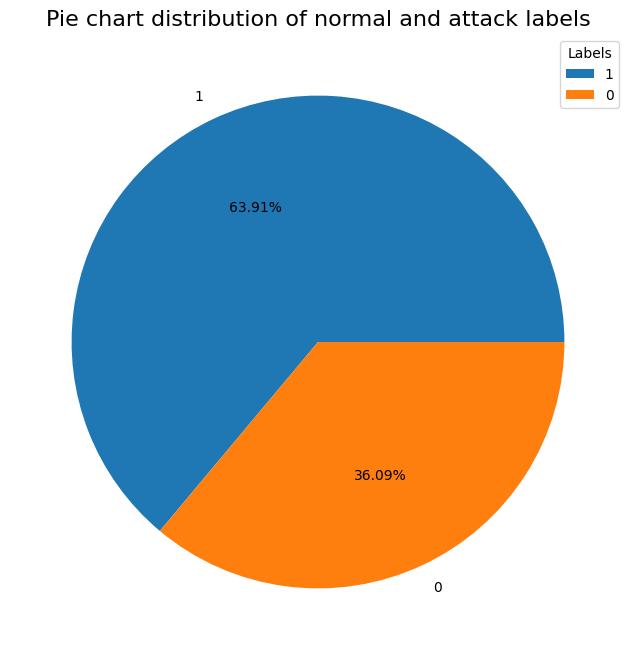

In [ ]:

# Función para graficar la distribución de las etiquetas
def plot_label_distribution(labels, title):
    plt.figure(figsize=(8, 8))
    label_counts = labels.value_counts()
    plt.pie(label_counts, labels=label_counts.index, autopct='%0.2f%%')
    plt.title(title, fontsize=16)
    plt.legend(title="Labels")
    plt.show()


plot_label_distribution(dataFinal['label'], "Pie chart distribution of normal and attack labels")


In [ ]:
#Obtener los tipos de ataques del dataset
dataFinal.attack_cat.unique()

array([0.66666667, 0.11111111, 0.        , 0.44444444, 0.88888889,
       0.77777778, 0.33333333, 0.22222222, 1.        , 0.55555556])

In [ ]:
dataFinal.info()

 # Imprimir el número de puntos de datos en el conjunto de entrenamiento
print(f"Número de datos en el conjunto de entrenamiento: {dataFinal.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   spkts              257673 non-null  float64
 2   dpkts              257673 non-null  float64
 3   rate               257673 non-null  float64
 4   sttl               257673 non-null  float64
 5   dttl               257673 non-null  float64
 6   sload              257673 non-null  float64
 7   dload              257673 non-null  float64
 8   sinpkt             257673 non-null  float64
 9   dinpkt             257673 non-null  float64
 10  sjit               257673 non-null  float64
 11  djit               257673 non-null  float64
 12  swin               257673 non-null  float64
 13  stcpb              257673 non-null  float64
 14  dtcpb              257673 non-null  float64
 15  tcprtt             257673 non-null  float64
 16  sy

In [ ]:
# Definir conjunto de parámetros para la búsqueda
parametros_busqueda = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 2],
    'min_samples_split': [2, 2],
    'min_samples_leaf': [1, 1]
}

# Clasificador Decision Tree
arbol_decision = DecisionTreeClassifier()

# Se usa GridSearchCV para encontrar los mejores parámetros
busqueda_grid = GridSearchCV(arbol_decision, parametros_busqueda, cv=5, scoring='recall')
busqueda_grid.fit(X_train, y_train)

# Obtener el mejor estimador encontrado por GridSearchCV
mejor_estimador = busqueda_grid.best_estimator_

# Imprimir los mejores parámetros y mejor puntaje de recall
print("Mejores parámetros encontrados:", busqueda_grid.best_params_)
print("Mejor puntaje de recall encontrado:", busqueda_grid.best_score_)

# Realizar predicciones con el mejor estimador
predicciones_y = mejor_estimador.predict(X_test)

# Calcula el puntaje de recall del modelo
recall = recall_score(y_test, predicciones_y)
print("Recall del mejor modelo:", recall)

Mejores parámetros encontrados: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor puntaje de recall encontrado: 0.9989155877211837
Recall del mejor modelo: 0.9988259584632201


Regla para un valor alto de recall: |--- sttl <= 0.24
|   |--- ct_dst_sport_ltm <= 0.03
|   |   |--- class: 0
|   |--- ct_dst_sport_ltm >  0.03
|   |   |--- class: 1
|--- sttl >  0.24
|   |--- synack <= 0.01
|   |   |--- class: 1
|   |--- synack >  0.01
|   |   |--- class: 1



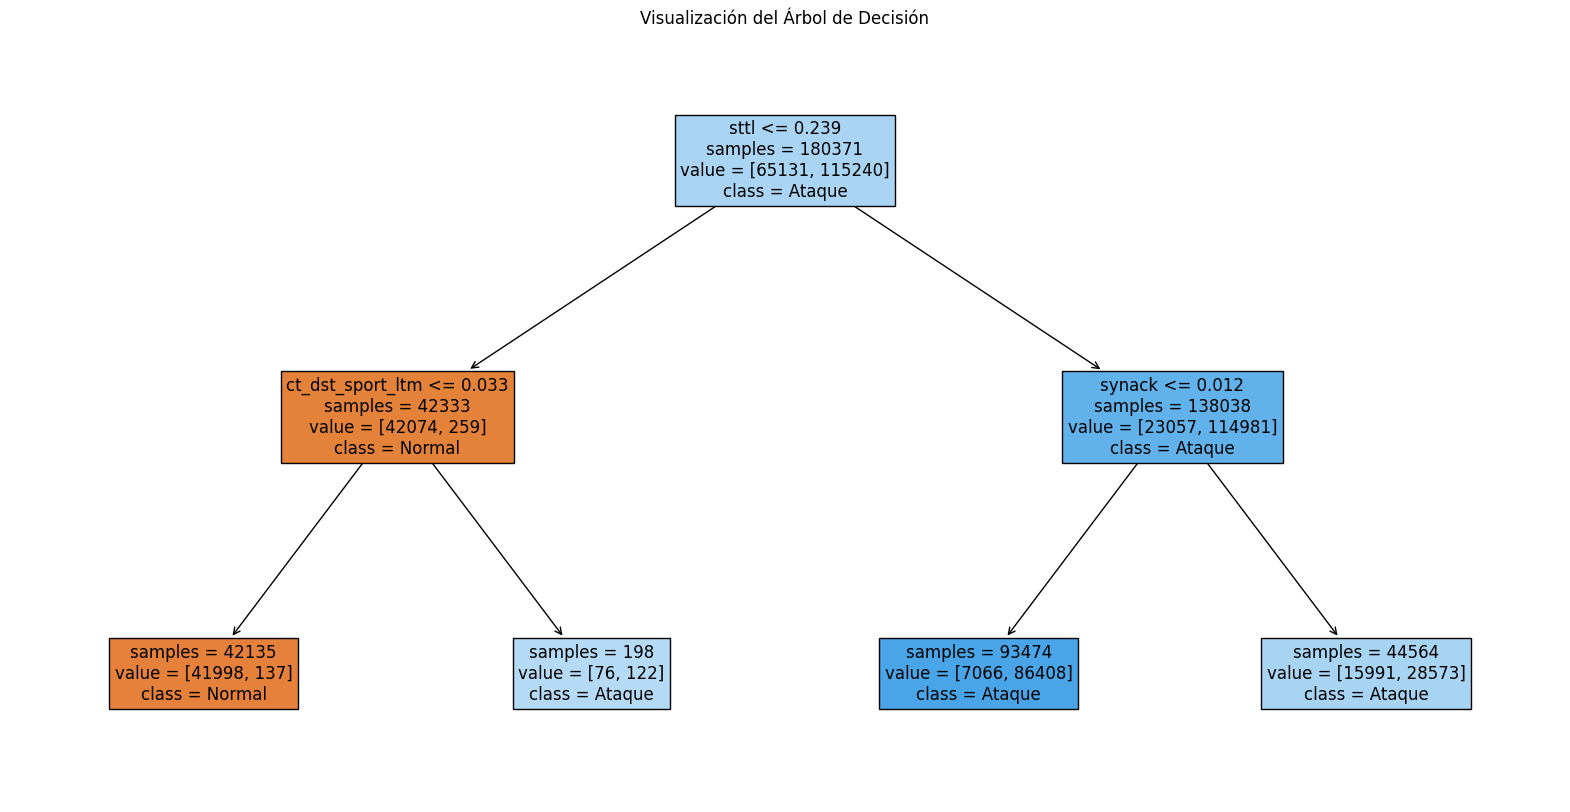

In [ ]:


print("Regla para un valor alto de recall:", export_text(mejor_estimador, feature_names=feature_names))

# Visualizar el árbol de decisión
grafica_arbol = dtreeviz.model(mejor_estimador,
                            X_train=X_train, y_train=y_train,
                            feature_names=feature_names)



mejor_estimador = busqueda_grid.best_estimator_

# Ajustar el tamaño de la figura
plt.figure(figsize=(20,10))

# Usar plot_tree para visualizar el árbol de decisiones
plot_tree(mejor_estimador,
          feature_names=feature_names,
          class_names=["Normal", "Ataque"],
          filled=True,
          impurity=False,
          fontsize=12)

# Mostrar el árbol de decisión
plt.title('Visualización del Árbol de Decisión')
plt.show()


In [ ]:
X_test = X_test.reset_index(drop=True)

#Definir reglas
rules = " (sttl <= 0.24 & ct_dst_sport_ltm > 0.03) | (sttl > 0.24 & synack <= 0.01) | (sttl > 0.24 & synack > 0.01)"


# Obtener los índices de los registros que cumplen las reglas
ind = X_test.query(rules).index

# Filtrar el conjunto de prueba (tanto X_test como y_test)
X_test_2 = X_test.loc[ind,:]
y_test_2 = y_test[ind]

print(X_test.shape)
print(X_test_2.shape)
print("Porcentaje de datos filtrados:", (1 - np.round(X_test_2.shape[0] / X_test.shape[0], 2)) * 100, "%")


(77302, 39)
(59151, 39)
Porcentaje de datos filtrados: 23.0 %


Accuracy: 0.9362479078967388
Precision: 0.963805689420281
Recall: 0.9596881959910913
F1 Score: 0.9617425356856618
AUC: 0.8886649155347321


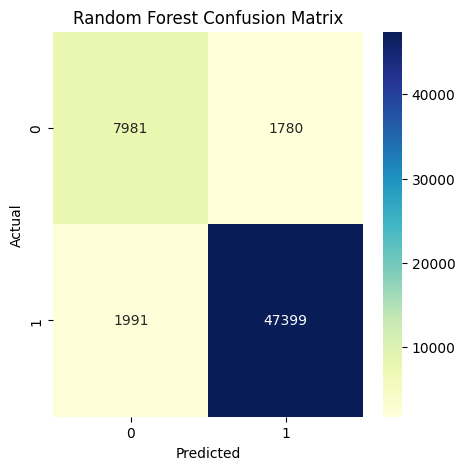

In [ ]:
# Crear un modelo de Random Forest
rf = RandomForestClassifier(random_state=123)

# Entrenar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba filtrados
y_pred = rf.predict(X_test_2)

# Utilizar la función print_metrics para mostrar las métricas de evaluación
print_metrics(y_test_2, y_pred)


# Utilizar la función plot_confusion_matrix para visualizar la matriz de confusión
plot_confusion_matrix(y_test_2, y_pred, "Random Forest Confusion Matrix")

In [ ]:

# Creación del DataFrame de clasificación
feature_imp = pd.DataFrame({'Nombre': X.columns, 'Importancia': rf.feature_importances_})

# Ordenar las características según su valor de importancia
feature_imp = feature_imp.sort_values('Importancia', ascending=False).reset_index(drop=True)

# Mostrar solo las 10 características más importantes
top_10_features = feature_imp[:10]

# Convertir el DataFrame en una lista de listas para tabulate
table_data = top_10_features.values.tolist()

# Encabezado de la tabla
headers = ['Nombre', 'Importancia']

# Imprimir la tabla utilizando tabulate
print(tabulate(table_data, headers=headers, tablefmt='fancy_grid'))


╒════════════════╤═══════════════╕
│ Nombre         │   Importancia │
╞════════════════╪═══════════════╡
│ sttl           │     0.156435  │
├────────────────┼───────────────┤
│ ct_state_ttl   │     0.0979509 │
├────────────────┼───────────────┤
│ sload          │     0.0578087 │
├────────────────┼───────────────┤
│ sbytes         │     0.0480176 │
├────────────────┼───────────────┤
│ rate           │     0.0429099 │
├────────────────┼───────────────┤
│ dload          │     0.0425758 │
├────────────────┼───────────────┤
│ smean          │     0.0408649 │
├────────────────┼───────────────┤
│ dttl           │     0.0405364 │
├────────────────┼───────────────┤
│ ct_dst_src_ltm │     0.0398233 │
├────────────────┼───────────────┤
│ ct_srv_dst     │     0.0360981 │
╘════════════════╧═══════════════╛


<Axes: >

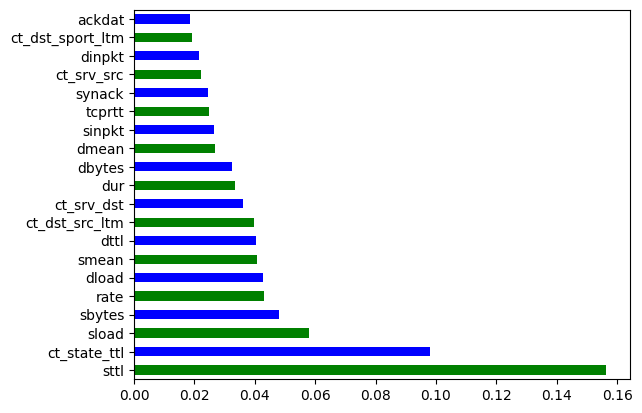

In [ ]:
# Graficar las características más importantes
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', color=['g', 'b'] * 5)

## Algoritmo Random Forest

Accuracy: 0.9385656257276656
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     27900
           1       0.95      0.96      0.95     49402

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302



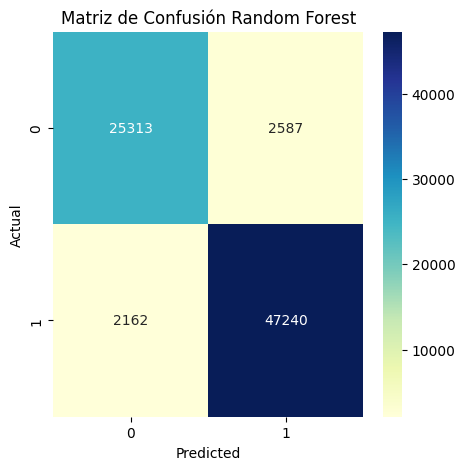

ROC-AUC Score: 0.9889774636552813


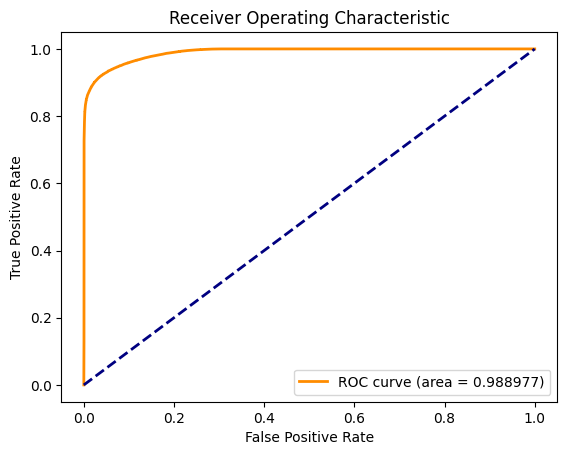

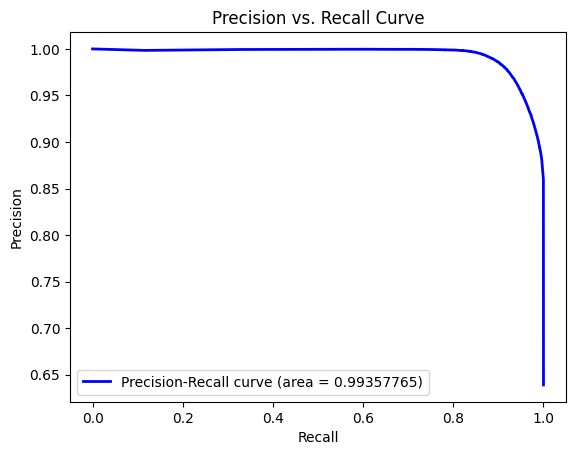

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(random_state=123)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
rf_predictions = rf_model.predict(X_test)

# Calcular la precisión y mostrar el reporte de clasificación
accuracy_rf = accuracy_score(y_test, rf_predictions)
print(f"Accuracy: {accuracy_rf}")
print(classification_report(y_test, rf_predictions))

# Graficar la matriz de confusión
plot_confusion_matrix(y_test, rf_predictions, "Matriz de Confusión Random Forest")

# Obtener probabilidades y calcular ROC-AUC
rf_probs = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, rf_probs)
print(f"ROC-AUC Score: {roc_auc}")

# Graficar la curva ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, rf_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.6f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calcular y graficar la curva de Precisión vs. Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, rf_probs)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.8f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall Curve')
plt.legend(loc="lower left")
plt.show()


## Algoritmo KNN

Accuracy: 0.9030038032651161
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     27900
           1       0.92      0.92      0.92     49402

    accuracy                           0.90     77302
   macro avg       0.89      0.90      0.89     77302
weighted avg       0.90      0.90      0.90     77302



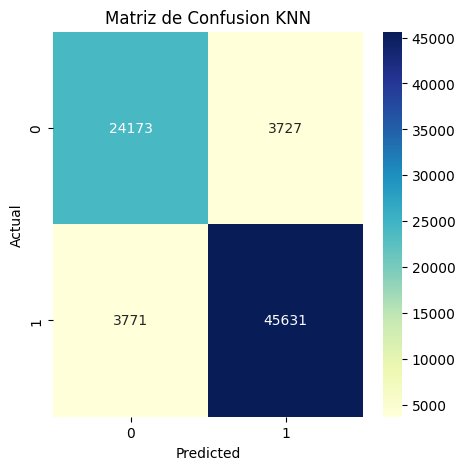

ROC-AUC Score: 0.953678282219503


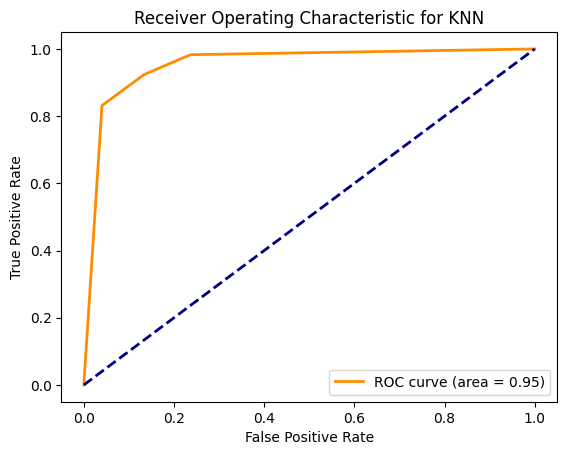

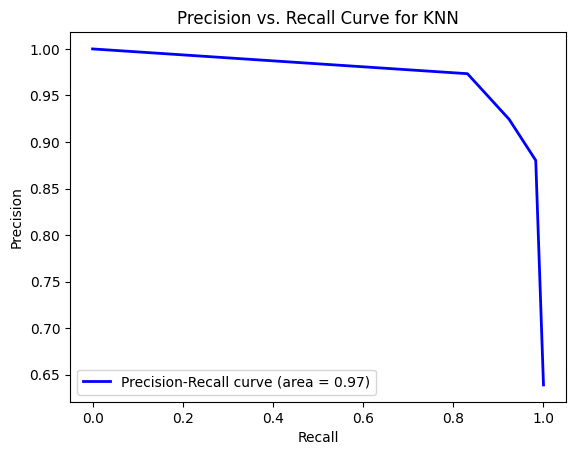

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Crear el modelo KNN con 3 vecinos
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
knn_predictions = knn_model.predict(X_test)

# Calcular la precisión y mostrar el reporte de clasificación
accuracy = accuracy_score(y_test, knn_predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, knn_predictions))

# Graficar la matriz de confusión
plot_confusion_matrix(y_test, knn_predictions, "Matriz de Confusion KNN")

# Obtener probabilidades y calcular ROC-AUC
knn_probs = knn_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, knn_probs)
print(f"ROC-AUC Score: {roc_auc}")

# Graficar la curva ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, knn_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc="lower right")
plt.show()

# Calcular y graficar la curva de Precisión vs. Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, knn_probs)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall Curve for KNN')
plt.legend(loc="lower left")
plt.show()


## Algoritmo XGBoost

Random state used for XGBoost: 116
Accuracy: 0.9373884246203203
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27900
           1       0.95      0.95      0.95     49402

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302



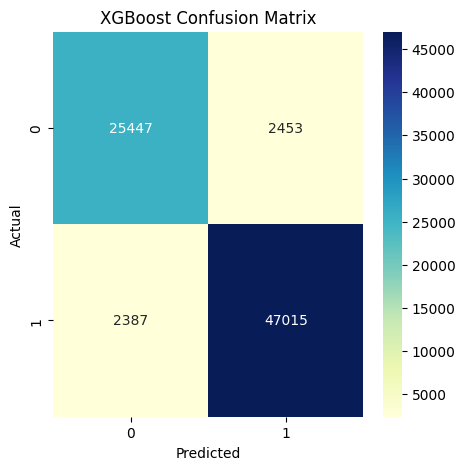

ROC-AUC Score: 0.9888358596774411


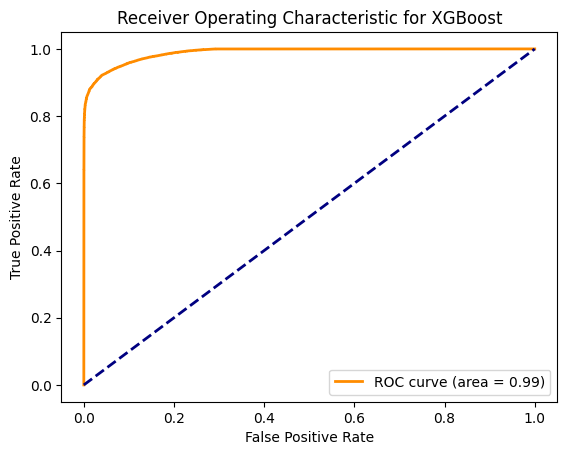

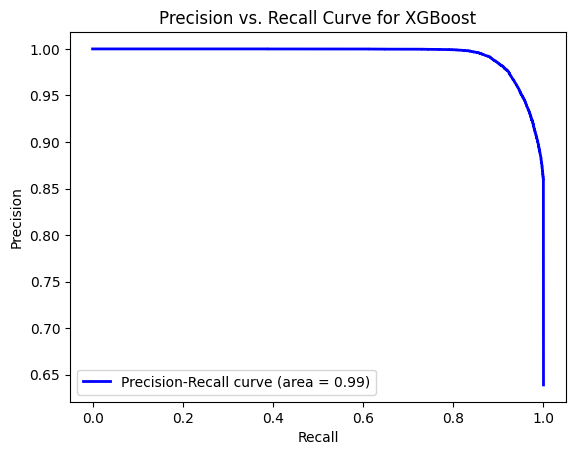

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Obtener un estado aleatorio para la reproducción de resultados
rand = random.randint(0, 1000)
print(f"Random state used for XGBoost: {rand}")

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=rand)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
xgb_predictions = xgb_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, xgb_predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, xgb_predictions))

# Graficar la matriz de confusión
plot_confusion_matrix(y_test, xgb_predictions, "XGBoost Confusion Matrix")

# Obtener probabilidades y calcular ROC-AUC
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, xgb_probs)
print(f"ROC-AUC Score: {roc_auc}")

# Graficar la curva ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, xgb_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for XGBoost')
plt.legend(loc="lower right")
plt.show()

# Calcular y graficar la curva de Precisión vs. Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, xgb_probs)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall Curve for XGBoost')
plt.legend(loc="lower left")
plt.show()


## Algoritmo SVM

ROC-AUC Score: 0.9563061872322729


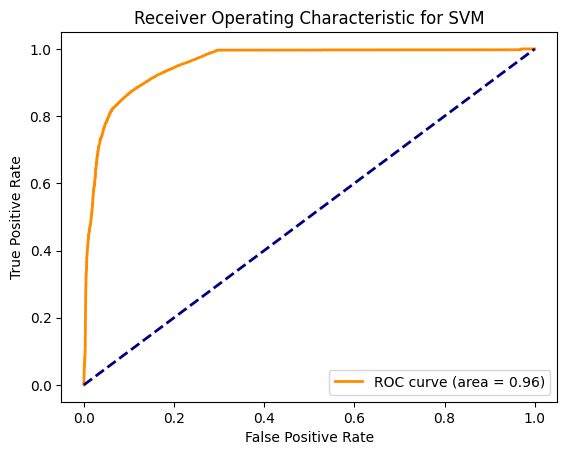

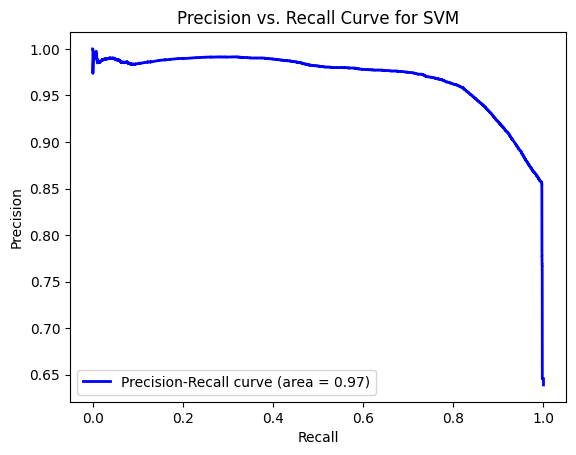

Accuracy (SVM): 0.8912059196398541
              precision    recall  f1-score   support

           0       0.99      0.71      0.82     27900
           1       0.86      1.00      0.92     49402

    accuracy                           0.89     77302
   macro avg       0.92      0.85      0.87     77302
weighted avg       0.90      0.89      0.89     77302



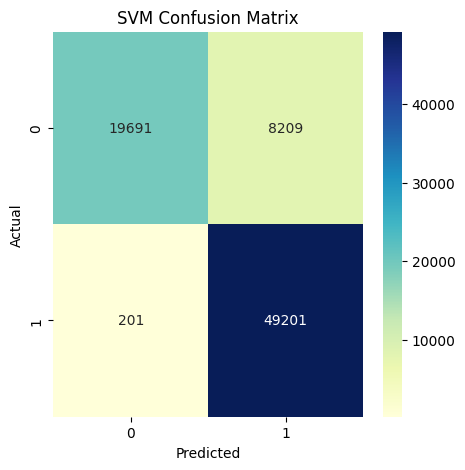

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Crear el modelo SVM con un kernel RBF y habilitar probabilidades
svm_model = SVC(kernel='rbf', C=1.0, gamma='auto', probability=True)

# Entrenar el modelo con los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Obtener probabilidades de la clase positiva
svm_probs = svm_model.predict_proba(X_test)[:, 1]

# Calcular ROC-AUC
roc_auc = roc_auc_score(y_test, svm_probs)
print(f"ROC-AUC Score: {roc_auc}")

fpr, tpr, thresholds = roc_curve(y_test, svm_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()


precision, recall, thresholds_pr = precision_recall_curve(y_test, svm_probs)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall Curve for SVM')
plt.legend(loc="lower left")
plt.show()

print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")



## Cross Validation evaluations


In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.semi_supervised import LabelSpreading
import xgboost as xgb
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

# Ignorar advertencias de convergencia
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Configuración de métricas de evaluación
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=0, average='binary'),
    'recall': make_scorer(recall_score, zero_division=0, average='binary'),
    'f1': make_scorer(f1_score, zero_division=0, average='binary'),
    'auc': 'roc_auc'
}

# Inicializar el objeto StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# Definir modelos
models = {
    'Random Forest': RandomForestClassifier(random_state=123),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'SVM': SVC(kernel='rbf', probability=True, random_state=123),  # SVM debe configurarse para emitir probabilidades para AUC
    'XGBoost': xgb.XGBClassifier(random_state=123),
    'Label Spreading': LabelSpreading(kernel='knn', alpha=0.8)
}

# Realizar validación cruzada y imprimir resultados
for name, model in models.items():
    results = cross_validate(model, X_train, y_train, cv=stratified_kfold, scoring=scoring_metrics, n_jobs=-1, return_train_score=False)
    print(f"{name} Metrics:")
    for metric, scores in results.items():
        if metric.startswith('test_'):
            print(f"{metric[5:].capitalize()}: %0.9f (+/- %0.9f)" % (scores.mean(), scores.std() * 2))
    print("\n")


Random Forest Metrics:
Accuracy: 0.949387641 (+/- 0.002127746)
Precision: 0.960676946 (+/- 0.002285858)
Recall: 0.960083304 (+/- 0.003049758)
F1: 0.960378885 (+/- 0.001687540)
Auc: 0.991622409 (+/- 0.000760808)


KNN Metrics:
Accuracy: 0.913600292 (+/- 0.003747412)
Precision: 0.934405858 (+/- 0.002058842)
Recall: 0.930059007 (+/- 0.005583377)
F1: 0.932225158 (+/- 0.003095802)
Auc: 0.958706060 (+/- 0.002373406)


SVM Metrics:
Accuracy: 0.906221058 (+/- 0.003816663)
Precision: 0.886385691 (+/- 0.004779104)
Recall: 0.978670600 (+/- 0.001060792)
F1: 0.930243177 (+/- 0.002648592)
Auc: 0.970784548 (+/- 0.001920395)


XGBoost Metrics:
Accuracy: 0.947031397 (+/- 0.004027079)
Precision: 0.962878390 (+/- 0.003002912)
Recall: 0.953870184 (+/- 0.004723135)
F1: 0.958351698 (+/- 0.003209033)
Auc: 0.991197820 (+/- 0.000809067)


Label Spreading Metrics:
Accuracy: 0.915019586 (+/- 0.004421750)
Precision: 0.929709097 (+/- 0.003898830)
Recall: 0.937903506 (+/- 0.004345153)
F1: 0.933786970 (+/- 0.0034579

## Test estadistico Wilcoxon

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
from scipy.stats import wilcoxon
from sklearn.model_selection import cross_validate

# Inicializar el objeto StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Configuración de validación cruzada para obtener puntuaciones AUC por pliegue
scoring = {'auc': 'roc_auc'}
models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'KNN': knn_model,
    'SVM': svm_model
}

# Almacenar resultados de AUC en un DataFrame
results_df = pd.DataFrame(index=range(1, 11))  # Suponiendo 10 pliegues por StratifiedKFold

for name, model in models.items():
    results = cross_validate(model, X_train, y_train, scoring=scoring, cv=stratified_kfold, return_train_score=False)
    results_df[name] = results['test_auc']

# Imprimir las puntuaciones AUC para cada modelo
print("Puntuaciones AUC para cada modelo:")
print(results_df)

# Aplicar la prueba de Wilcoxon entre cada par de modelos y almacenar en un DataFrame
comparison_results = []

for i, (model1, scores1) in enumerate(results_df.items()):
    for model2, scores2 in list(results_df.items())[i+1:]:
        statistic, p_value = wilcoxon(scores1, scores2)
        comparison_results.append({
            'Comparación': f"{model1} vs {model2}",
            'Estadístico de Wilcoxon': statistic,
            'Valor p': p_value
        })

comparison_df = pd.DataFrame(comparison_results)

# Imprimir los resultados de las comparaciones
print("\nResultados de la prueba de Wilcoxon entre modelos:")
print(comparison_df.to_string(index=False))


Puntuaciones AUC para cada modelo:
    Random Forest   XGBoost       KNN  Label Spreading       SVM
1        0.991868  0.991341  0.960445         0.979941  0.961171
2        0.991370  0.990637  0.957936         0.978148  0.961188
3        0.991494  0.990849  0.957654         0.978053  0.962492
4        0.991272  0.991174  0.957943         0.978888  0.962844
5        0.991722  0.991128  0.959686         0.978196  0.959978
6        0.991355  0.990945  0.958578         0.977794  0.959571
7        0.991187  0.990986  0.956666         0.977794  0.959865
8        0.991514  0.991186  0.960543         0.979875  0.962079
9        0.991917  0.991574  0.958457         0.978910  0.963376
10       0.992525  0.992159  0.959155         0.979008  0.963129

Resultados de la prueba de Wilcoxon entre modelos:
                     Comparación  Estadístico de Wilcoxon  Valor p
        Random Forest vs XGBoost                      0.0 0.001953
            Random Forest vs KNN                      0.0 0.0019